In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [2]:
dataframe = pd.read_csv("/Users/Shikha/Desktop/kaggle/urban_clap.csv")

In [3]:
dataframe.head()

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day)
0,BBCHH,1,2018-05-20,2018-05-21,D,14
1,CHWFD,1,2018-09-23,2018-09-23,C,8
2,DYDMF,2,2018-11-10,2018-11-13,C,11
3,EZYSA,3,2018-04-12,2018-04-16,B,8
4,HWAKX,3,2018-08-05,2018-08-06,B,11


,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day)
0,BBCHH,1,2018-05-20,2018-05-21,D,14
1,CHWFD,1,2018-09-23,2018-09-23,C,8
2,DYDMF,2,2018-11-10,2018-11-13,C,11
3,EZYSA,3,2018-04-12,2018-04-16,B,8
4,HWAKX,3,2018-08-05,2018-08-06,B,11


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30940 entries, 0 to 30939
Data columns (total 6 columns):
Transaction_ID                       30940 non-null object
Profile ID                           30940 non-null int64
Date_of_Booking                      30940 non-null object
Date_of_Service_Requested            30940 non-null object
Source                               30940 non-null object
Slot of Booking (Hour of the Day)    30940 non-null int64
dtypes: int64(2), object(4)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30940 entries, 0 to 30939
Data columns (total 6 columns):
Transaction_ID                       30940 non-null object
Profile ID                           30940 non-null int64
Date_of_Booking                      30940 non-null object
Date_of_Service_Requested            30940 non-null object
Source                               30940 non-null object
Slot of Booking (Hour of the Day)    30940 non-null int64
dtypes: int64(2), object(4)
me

In [5]:
dataframe['Date_of_Booking'] = pd.to_datetime(dataframe['Date_of_Booking'])


In [6]:
a = dataframe.groupby(['Profile ID'])['Date_of_Booking'].min().reset_index()

In [7]:
a['yearmonth'] = a['Date_of_Booking'].dt.year*100 + a['Date_of_Booking'].dt.month

In [8]:
b = pd.DataFrame(a.groupby(['yearmonth'])['Profile ID'].count())

In [9]:
b = b.reset_index()
b.columns = ["YearMonth","Acquired_Users"]
b

,YearMonth,Acquired_Users
0,201712,2424
1,201801,1892
2,201802,1549
3,201803,1490
4,201804,1346
5,201805,1264
6,201806,1273
7,201807,1208
8,201808,1120
9,201809,1020


,YearMonth,Acquired_Users
0,201712,2424
1,201801,1892
2,201802,1549
3,201803,1490
4,201804,1346
5,201805,1264
6,201806,1273
7,201807,1208
8,201808,1120
9,201809,1020


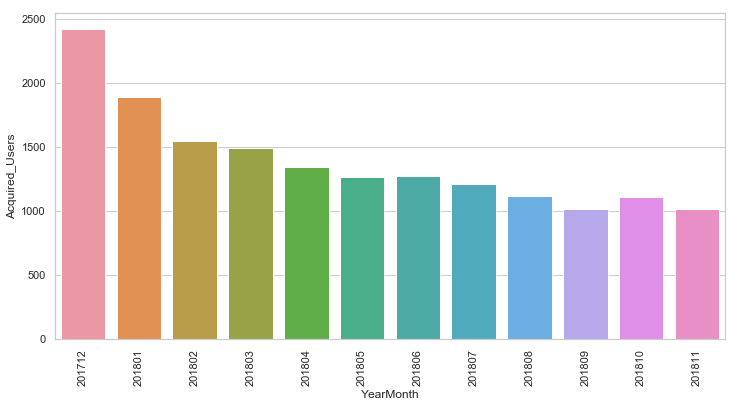

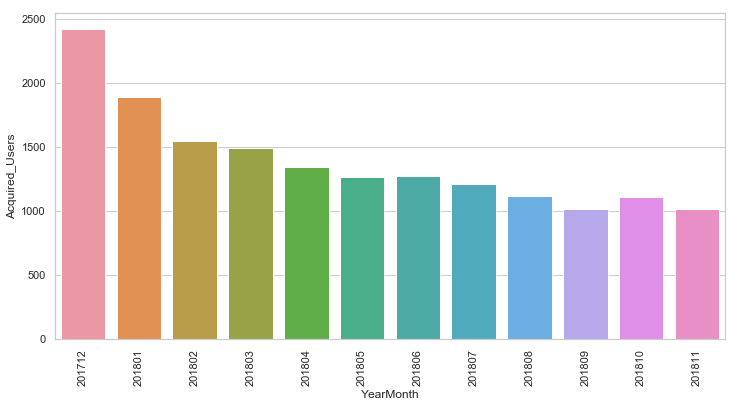

In [10]:
sns.set(style="whitegrid")

fig, (ax) = plt.subplots(figsize=(12,6))
chart = sns.barplot(ax = ax, x = "YearMonth", y = "Acquired_Users",data=b)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

In [11]:
First_visit = dataframe.groupby(["Profile ID"])["Date_of_Booking"].nsmallest(2).groupby(level="Profile ID").first()

In [12]:
First_visit = First_visit.to_frame().reset_index()
First_visit.columns = ["Profile ID","First Visit"]
First_visit

,Profile ID,First Visit
0,1,2018-05-20
1,2,2018-11-10
2,3,2018-04-12
3,4,2018-03-02
4,5,2018-01-06
5,6,2018-07-18
6,7,2017-12-07
7,8,2018-11-29
8,9,2018-03-08
9,10,2018-10-26


,Profile ID,First Visit
0,1,2018-05-20
1,2,2018-11-10
2,3,2018-04-12
3,4,2018-03-02
4,5,2018-01-06
5,6,2018-07-18
6,7,2017-12-07
7,8,2018-11-29
8,9,2018-03-08
9,10,2018-10-26


In [13]:
Repeat_visit = dataframe.groupby(["Profile ID"])["Date_of_Booking"].nsmallest(2).groupby(level="Profile ID").last()

In [14]:
Repeat_visit = Repeat_visit.to_frame().reset_index()
Repeat_visit.columns = ["Profile ID","Repeat Visit"]
Repeat_visit

,Profile ID,Repeat Visit
0,1,2018-09-23
1,2,2018-11-10
2,3,2018-08-05
3,4,2018-03-02
4,5,2018-01-06
5,6,2018-07-18
6,7,2017-12-07
7,8,2018-11-30
8,9,2018-03-08
9,10,2018-10-26


,Profile ID,Repeat Visit
0,1,2018-09-23
1,2,2018-11-10
2,3,2018-08-05
3,4,2018-03-02
4,5,2018-01-06
5,6,2018-07-18
6,7,2017-12-07
7,8,2018-11-30
8,9,2018-03-08
9,10,2018-10-26


In [15]:
df_visit = pd.merge(First_visit,Repeat_visit,on="Profile ID")
df_visit

,Profile ID,First Visit,Repeat Visit
0,1,2018-05-20,2018-09-23
1,2,2018-11-10,2018-11-10
2,3,2018-04-12,2018-08-05
3,4,2018-03-02,2018-03-02
4,5,2018-01-06,2018-01-06
5,6,2018-07-18,2018-07-18
6,7,2017-12-07,2017-12-07
7,8,2018-11-29,2018-11-30
8,9,2018-03-08,2018-03-08
9,10,2018-10-26,2018-10-26


,Profile ID,First Visit,Repeat Visit
0,1,2018-05-20,2018-09-23
1,2,2018-11-10,2018-11-10
2,3,2018-04-12,2018-08-05
3,4,2018-03-02,2018-03-02
4,5,2018-01-06,2018-01-06
5,6,2018-07-18,2018-07-18
6,7,2017-12-07,2017-12-07
7,8,2018-11-29,2018-11-30
8,9,2018-03-08,2018-03-08
9,10,2018-10-26,2018-10-26


In [16]:
df_visit["Repeat_duration"] = df_visit["Repeat Visit"]-df_visit["First Visit"]
df_visit

,Profile ID,First Visit,Repeat Visit,Repeat_duration
0,1,2018-05-20,2018-09-23,126 days
1,2,2018-11-10,2018-11-10,0 days
2,3,2018-04-12,2018-08-05,115 days
3,4,2018-03-02,2018-03-02,0 days
4,5,2018-01-06,2018-01-06,0 days
5,6,2018-07-18,2018-07-18,0 days
6,7,2017-12-07,2017-12-07,0 days
7,8,2018-11-29,2018-11-30,1 days
8,9,2018-03-08,2018-03-08,0 days
9,10,2018-10-26,2018-10-26,0 days


,Profile ID,First Visit,Repeat Visit,Repeat_duration
0,1,2018-05-20,2018-09-23,126 days
1,2,2018-11-10,2018-11-10,0 days
2,3,2018-04-12,2018-08-05,115 days
3,4,2018-03-02,2018-03-02,0 days
4,5,2018-01-06,2018-01-06,0 days
5,6,2018-07-18,2018-07-18,0 days
6,7,2017-12-07,2017-12-07,0 days
7,8,2018-11-29,2018-11-30,1 days
8,9,2018-03-08,2018-03-08,0 days
9,10,2018-10-26,2018-10-26,0 days


In [17]:
df_visit["Thirty_Day_Repeat"] = np.where(((df_visit["Repeat_duration"])>"0 days") & ((df_visit["Repeat_duration"])<="30 days"),1,0)

In [18]:
df_visit["Ninety_Day_Repeat"] =  np.where(((df_visit["Repeat_duration"])>"0 days") &
                                          ((df_visit["Repeat_duration"])<="90 days"),1,0)
df_visit

,Profile ID,First Visit,Repeat Visit,Repeat_duration,Thirty_Day_Repeat,Ninety_Day_Repeat
0,1,2018-05-20,2018-09-23,126 days,0,0
1,2,2018-11-10,2018-11-10,0 days,0,0
2,3,2018-04-12,2018-08-05,115 days,0,0
3,4,2018-03-02,2018-03-02,0 days,0,0
4,5,2018-01-06,2018-01-06,0 days,0,0
5,6,2018-07-18,2018-07-18,0 days,0,0
6,7,2017-12-07,2017-12-07,0 days,0,0
7,8,2018-11-29,2018-11-30,1 days,1,1
8,9,2018-03-08,2018-03-08,0 days,0,0
9,10,2018-10-26,2018-10-26,0 days,0,0


,Profile ID,First Visit,Repeat Visit,Repeat_duration,Thirty_Day_Repeat,Ninety_Day_Repeat
0,1,2018-05-20,2018-09-23,126 days,0,0
1,2,2018-11-10,2018-11-10,0 days,0,0
2,3,2018-04-12,2018-08-05,115 days,0,0
3,4,2018-03-02,2018-03-02,0 days,0,0
4,5,2018-01-06,2018-01-06,0 days,0,0
5,6,2018-07-18,2018-07-18,0 days,0,0
6,7,2017-12-07,2017-12-07,0 days,0,0
7,8,2018-11-29,2018-11-30,1 days,1,1
8,9,2018-03-08,2018-03-08,0 days,0,0
9,10,2018-10-26,2018-10-26,0 days,0,0


In [19]:
df_visit["Acquired_Month"] = df_visit['First Visit'].dt.year*100 + df_visit['First Visit'].dt.month
df_visit

,Profile ID,First Visit,Repeat Visit,Repeat_duration,Thirty_Day_Repeat,Ninety_Day_Repeat,Acquired_Month
0,1,2018-05-20,2018-09-23,126 days,0,0,201805
1,2,2018-11-10,2018-11-10,0 days,0,0,201811
2,3,2018-04-12,2018-08-05,115 days,0,0,201804
3,4,2018-03-02,2018-03-02,0 days,0,0,201803
4,5,2018-01-06,2018-01-06,0 days,0,0,201801
5,6,2018-07-18,2018-07-18,0 days,0,0,201807
6,7,2017-12-07,2017-12-07,0 days,0,0,201712
7,8,2018-11-29,2018-11-30,1 days,1,1,201811
8,9,2018-03-08,2018-03-08,0 days,0,0,201803
9,10,2018-10-26,2018-10-26,0 days,0,0,201810


,Profile ID,First Visit,Repeat Visit,Repeat_duration,Thirty_Day_Repeat,Ninety_Day_Repeat,Acquired_Month
0,1,2018-05-20,2018-09-23,126 days,0,0,201805
1,2,2018-11-10,2018-11-10,0 days,0,0,201811
2,3,2018-04-12,2018-08-05,115 days,0,0,201804
3,4,2018-03-02,2018-03-02,0 days,0,0,201803
4,5,2018-01-06,2018-01-06,0 days,0,0,201801
5,6,2018-07-18,2018-07-18,0 days,0,0,201807
6,7,2017-12-07,2017-12-07,0 days,0,0,201712
7,8,2018-11-29,2018-11-30,1 days,1,1,201811
8,9,2018-03-08,2018-03-08,0 days,0,0,201803
9,10,2018-10-26,2018-10-26,0 days,0,0,201810


In [20]:
def Repeat_Rate_Thirty_Days(month):
    total_acquired = df_visit.loc[df_visit.Acquired_Month==month, "Acquired_Month"].count()
    Repeat_occurance = df_visit.loc[(df_visit.Acquired_Month==month) &
                                    (df_visit.Thirty_Day_Repeat==1),"Thirty_Day_Repeat"].count()
    Repeat_Rate = (Repeat_occurance/total_acquired)*100
    
    return Repeat_Rate
    
    

In [21]:
def Repeat_Rate_Ninety_Days(month1,month2,month3):
    
   
    total_acquired = df_visit.loc[(df_visit.Acquired_Month.isin([month1,month2,month3])),
                                  "Acquired_Month"].count()
    Repeat_occurance = df_visit.loc[(df_visit.Acquired_Month.isin([month1,month2,month3])) &
                                    (df_visit.Ninety_Day_Repeat==1),"Ninety_Day_Repeat"].count()
    Repeat_Rate = (Repeat_occurance/total_acquired)*100
    
    return Repeat_Rate

In [22]:
print("30 days repeat rate of users acquired in Dec 2017 is :", Repeat_Rate_Thirty_Days(201712))

30 days repeat rate of users acquired in Dec 2017 is : 16.33663366336634
30 days repeat rate of users acquired in Dec 2017 is : 16.33663366336634


In [23]:
print("90 days repeat rate of users acquired in Jan, Feb, March 2018 is :",
      Repeat_Rate_Ninety_Days(201801,201802,201803))

90 days repeat rate of users acquired in Jan, Feb, March 2018 is : 20.54350030419793
90 days repeat rate of users acquired in Jan, Feb, March 2018 is : 20.54350030419793
